# Multi-Armed Bandits

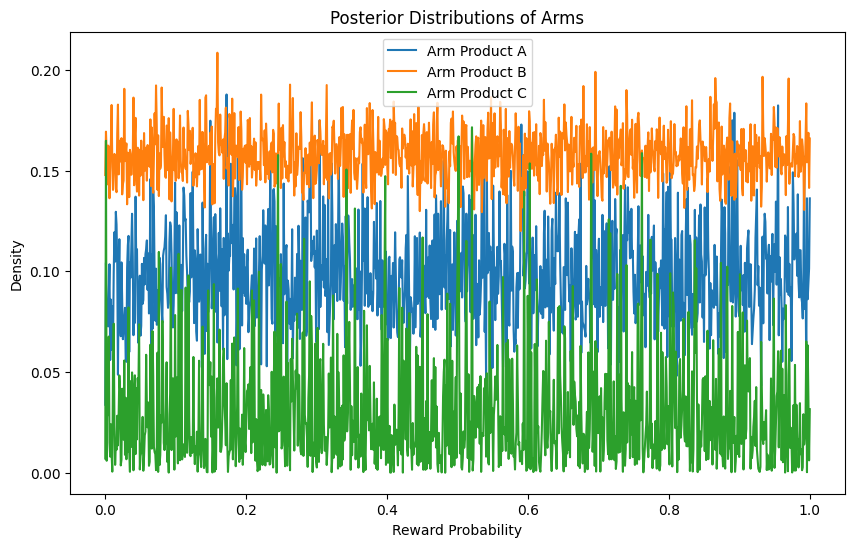

Mean Rewards Per Arm: {'Product A': 0.09259259259259259, 'Product B': 0.15737298636926889, 'Product C': 0.0}
Total Rewards: [ 15. 127.   0.]
Priors (Alpha): [ 16. 128.   1.]
Priors (Beta): [148. 681.  32.]


In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Define the arms (e.g., product IDs or recommendation strategies)
arms = ['Product A', 'Product B', 'Product C']

# Function to simulate user interaction and reward (1 if purchased, 0 otherwise)
def simulate_reward(arm):
    # Simulated reward probabilities for each product
    reward_probabilities = {'Product A': 0.1, 'Product B': 0.15, 'Product C': 0.05}
    return 1 if random.random() < reward_probabilities[arm] else 0

# Initialize priors (alpha and beta) for each arm
alpha = np.ones(len(arms))
beta = np.ones(len(arms))

# Function to select an arm using Thompson Sampling
def thompson_sampling(alpha, beta):
    samples = [np.random.beta(alpha[i], beta[i]) for i in range(len(arms))]
    return np.argmax(samples)

# Simulate rounds of experimentation
n_rounds = 1000
rewards = np.zeros(len(arms))

for _ in range(n_rounds):
    chosen_arm = thompson_sampling(alpha, beta)
    reward = simulate_reward(arms[chosen_arm])
    
    # Update priors based on observed reward
    if reward == 1:
        alpha[chosen_arm] += 1
    else:
        beta[chosen_arm] += 1
    
    rewards[chosen_arm] += reward

# Print results
total_rewards = rewards
priors_alpha = alpha
priors_beta = beta

# Plot the posterior distributions
x = np.linspace(0, 1, 1000)
plt.figure(figsize=(10, 6))
for i in range(len(arms)):
    plt.plot(x, np.random.beta(alpha[i], beta[i], size=1000), label=f'Arm {arms[i]}')

plt.title('Posterior Distributions of Arms')
plt.xlabel('Reward Probability')
plt.ylabel('Density')
plt.legend()
plt.show()

# Calculate the mean reward for each arm
mean_rewards = rewards / (alpha + beta - 2)
mean_rewards_per_arm = {arms[i]: mean_rewards[i] for i in range(len(arms))}
print("Mean Rewards Per Arm:", mean_rewards_per_arm)
print("Total Rewards:", total_rewards)
print("Priors (Alpha):", priors_alpha)
print("Priors (Beta):", priors_beta)
